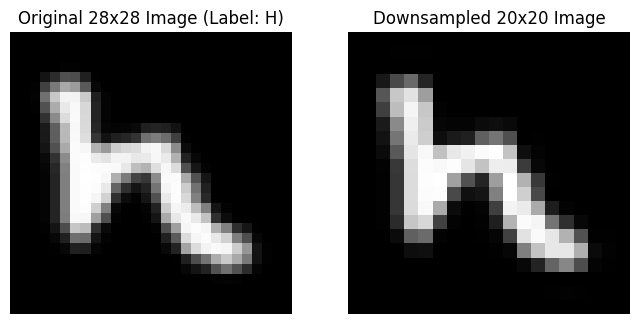

In [38]:
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

# 加载 EMNIST 数据集
emnist = tfds.load('emnist/letters', as_supervised=True)

# 获取训练数据集
test_data = emnist['test']

# 将训练数据转换为 NumPy 数组（图像和标签）
test_images = []
test_labels = []

for image, label in test_data:
    test_images.append(np.array(image))
    test_labels.append(label.numpy())

# 随机从训练集中选择一个样本
random_index = np.random.choice(len(test_images))
original_image = test_images[random_index]
label = test_labels[random_index]

# 如果图像有三个维度 (28, 28, 1)，去掉通道维度
if original_image.ndim == 3:
    original_image = original_image.squeeze(axis=-1)  # 去掉通道维度

# 逆操作：先进行顺时针旋转90度，再进行左右翻转
# 顺时针旋转90度可以通过逆时针旋转90度三次来实现
restored_image = np.rot90(original_image, k=3)  # 逆时针旋转三次，即顺时针旋转一次
restored_image = np.fliplr(restored_image)  # 进行左右翻转恢复原图

# 使用 zoom 函数将图像从 28x28 缩放到 20x20
downsampled_image = zoom(restored_image, (20 / 28, 20 / 28))

# 绘制原始图像和降采样后的图像
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# 显示原始图像（28x28）
axes[0].imshow(restored_image, cmap='gray')
axes[0].set_title(f'Original 28x28 Image (Label: {chr(label + 64)})')
axes[0].axis('off')

# 显示降采样后的图像（20x20）
axes[1].imshow(downsampled_image, cmap='gray')
axes[1].set_title('Downsampled 20x20 Image')
axes[1].axis('off')

plt.show()
